# Classificação de Autismo: Análise de Distâncias Faciais

Este notebook tem como objetivo classificar o autismo com base em medições de distâncias faciais. Usaremos conjuntos de dados contendo distâncias calculadas a partir de marcos faciais para indivíduos com e sem autismo. A classificação será realizada utilizando os algoritmos K-Nearest Neighbors (KNN) e Random Forest.

## Tabela de Conteúdos
1. [Importação de Bibliotecas](#importação-de-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Pré-processamento de Dados](#pré-processamento-de-dados)
4. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
5. [Treinamento e Avaliação do Modelo](#treinamento-e-avaliação-do-modelo)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Classificador Random Forest](#classificador-random-forest)

### Importando bibliotecas

In [19]:
#importação-de-bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


### Carregamento de dados
Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.



In [20]:
# Carregar os conjuntos de dados
df_no_autism = pd.read_csv("../../data/preprocessed_landmark/distances_no_autism.csv")
df_with_autism = pd.read_csv("../../data/preprocessed_landmark/distances_with_autism.csv")

# Combinar os conjuntos de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)


### Pré-processamento de Dados
Padronizar as características relevantes para melhorar o desempenho dos modelos de aprendizado de máquina.

In [21]:
# Pré-processar os dados
standardScaler = StandardScaler()

# Selecionar colunas a serem padronizadas (atualize com base nas suas colunas de distância)
columns_to_scale = ['middle_facial_height', 'lower_facial_height', 
                    'philtrum', 'intercanthal_width', 'biocular_width', 'nasal_width', 'mouth_width']

data_total[columns_to_scale] = standardScaler.fit_transform(data_total[columns_to_scale])


KeyError: "['upper_facial_height'] not in index"

### Análise Exploratória de Dados
Análise exploratória inicial para entender melhor o conjunto de dados.

Text(0, 0.5, 'Contagem')

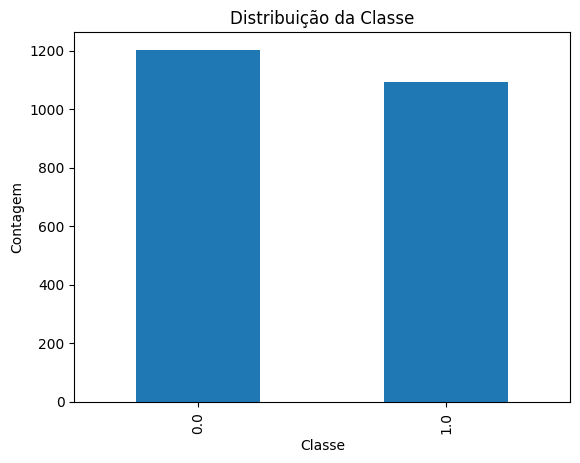

In [15]:
# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')


### Treinamento e Avaliação do Modelo
#### K-Nearest Neighbors (KNN)
Treinar um classificador KNN e avaliar seu desempenho usando validação cruzada.



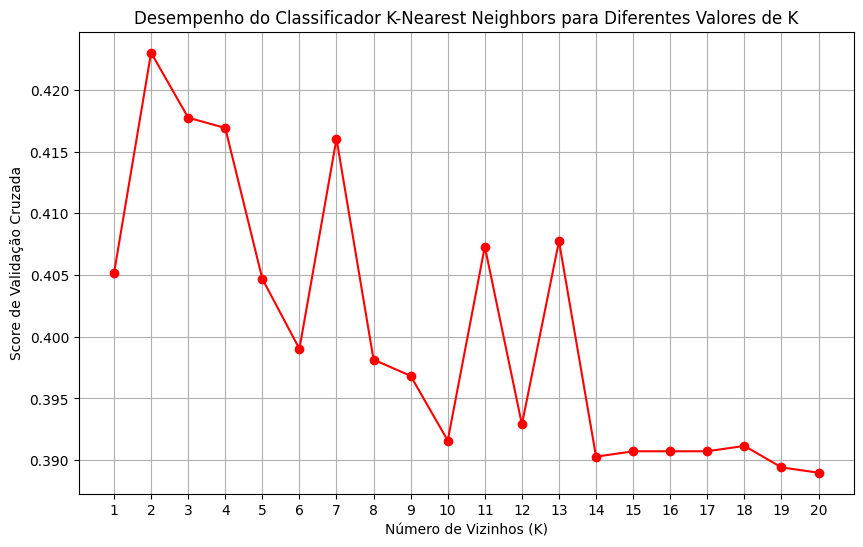

In [18]:
# Dividir os dados em características e variável alvo
y = data_total['class']
X = data_total.drop(['class'], axis=1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()


#### Classificador Random Forest
Treinar um classificador Random Forest e avaliar seu desempenho.



In [17]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.6319384849060186
